# Titanic Survivor prediction

# 1. Problem and Motivation

## 1.1 Our goal:
Predict survival on the Titanic

## 1.2 Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Data understanding and visulization

## 2.1 Import packages

In [235]:

# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## 2.2 Load Data

In [2]:
train=pd.read_csv('train.csv',sep=',')
test    = pd.read_csv("test.csv",sep=',')

full = train.append( test , ignore_index = True )
titanic = full[ :891 ]

print "lenth Of Train:", len(train), "lenth Of Test:",len(test)

print 'Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape


lenth Of Train: 891 lenth Of Test: 418
Datasets: full: (1309, 12) titanic: (891, 12)


## 2.3 Statistical summaries and visualisations

To understand the data we are now going to consider some key facts about various variables including their relationship with the target variable, i.e. survival.
We start by looking at a few lines of the data

In [3]:
# Run the code to see the variables, then read the variable description below to understand them.
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 66.2+ KB


In [5]:
titanic.describe(include="all")

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,NaN,2,NaN,NaN,681
top,NaN,C23 C25 C27,S,NaN,"Graham, Mr. George Edward",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,4,644,NaN,1,NaN,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,446.000000,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,257.353842,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,7.910400,NaN,0.000000,223.500000,2.000000,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,14.454200,NaN,0.000000,446.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,31.000000,NaN,0.000000,668.500000,3.000000,NaN,1.000000,1.000000,NaN


**Variable Description (From Kaggle webpage of this project)**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation
 

### 2.4.1 Next have a look at some key information about the variables
An numeric variable is one with values of integers or real numbers while a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, such as blood type.

Notice especially what type of variable each is, how many observations there are and some of the variable values.

An interesting observation could for example be the minimum age 0.42, do you know why this is?


In [6]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,NaN,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,NaN,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


### 2.4.2 A heat map of correlation may give us a understanding of which variables are important

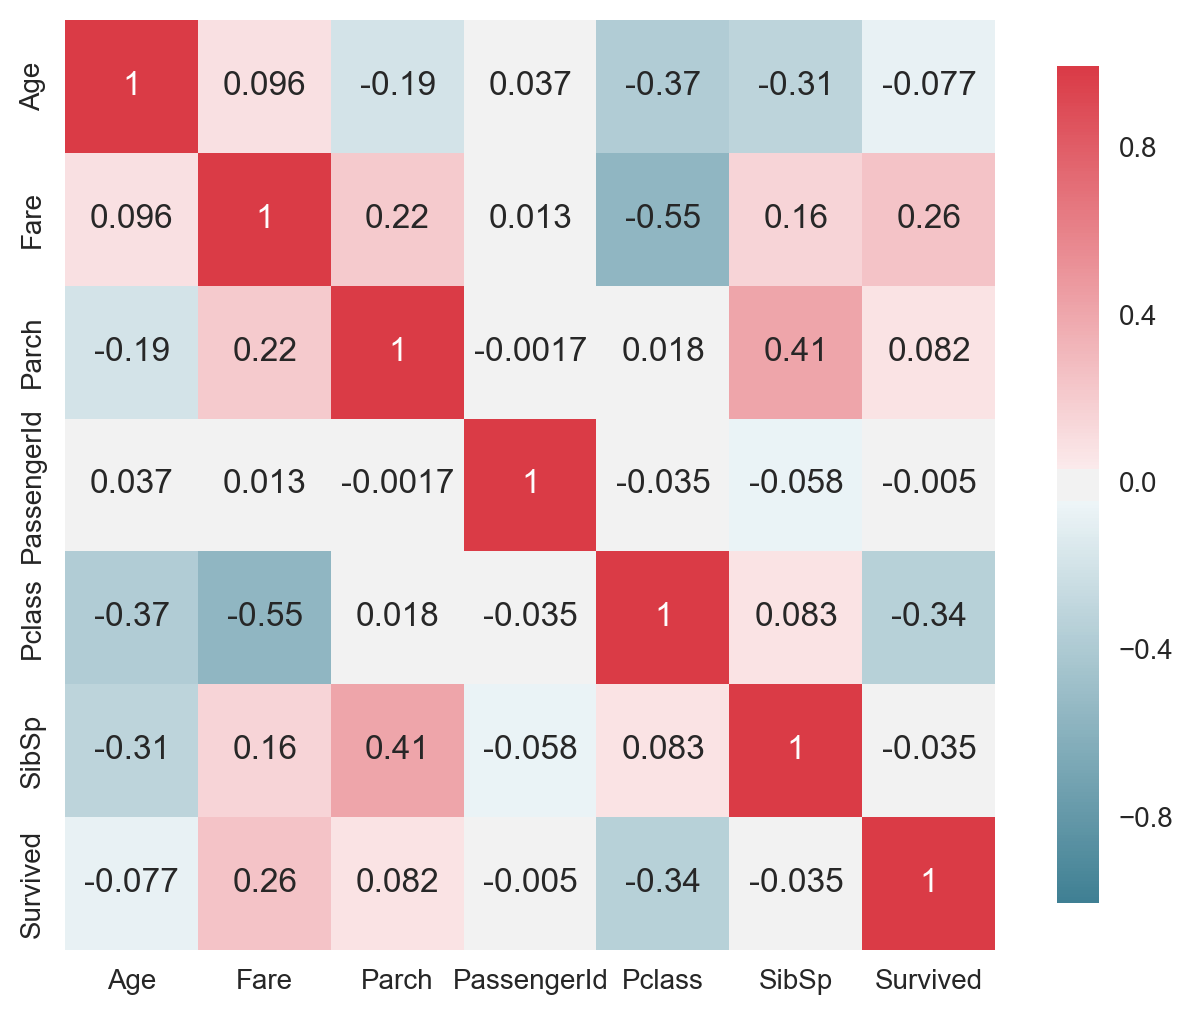

In [7]:
corr = titanic.corr()
figure, ax = plt.subplots( figsize =( 8 , 6 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
correlation = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

### 2.4.3 Let's further explore the relationship between the features and survival of passengers 
We start by looking at the relationship between age and survival.

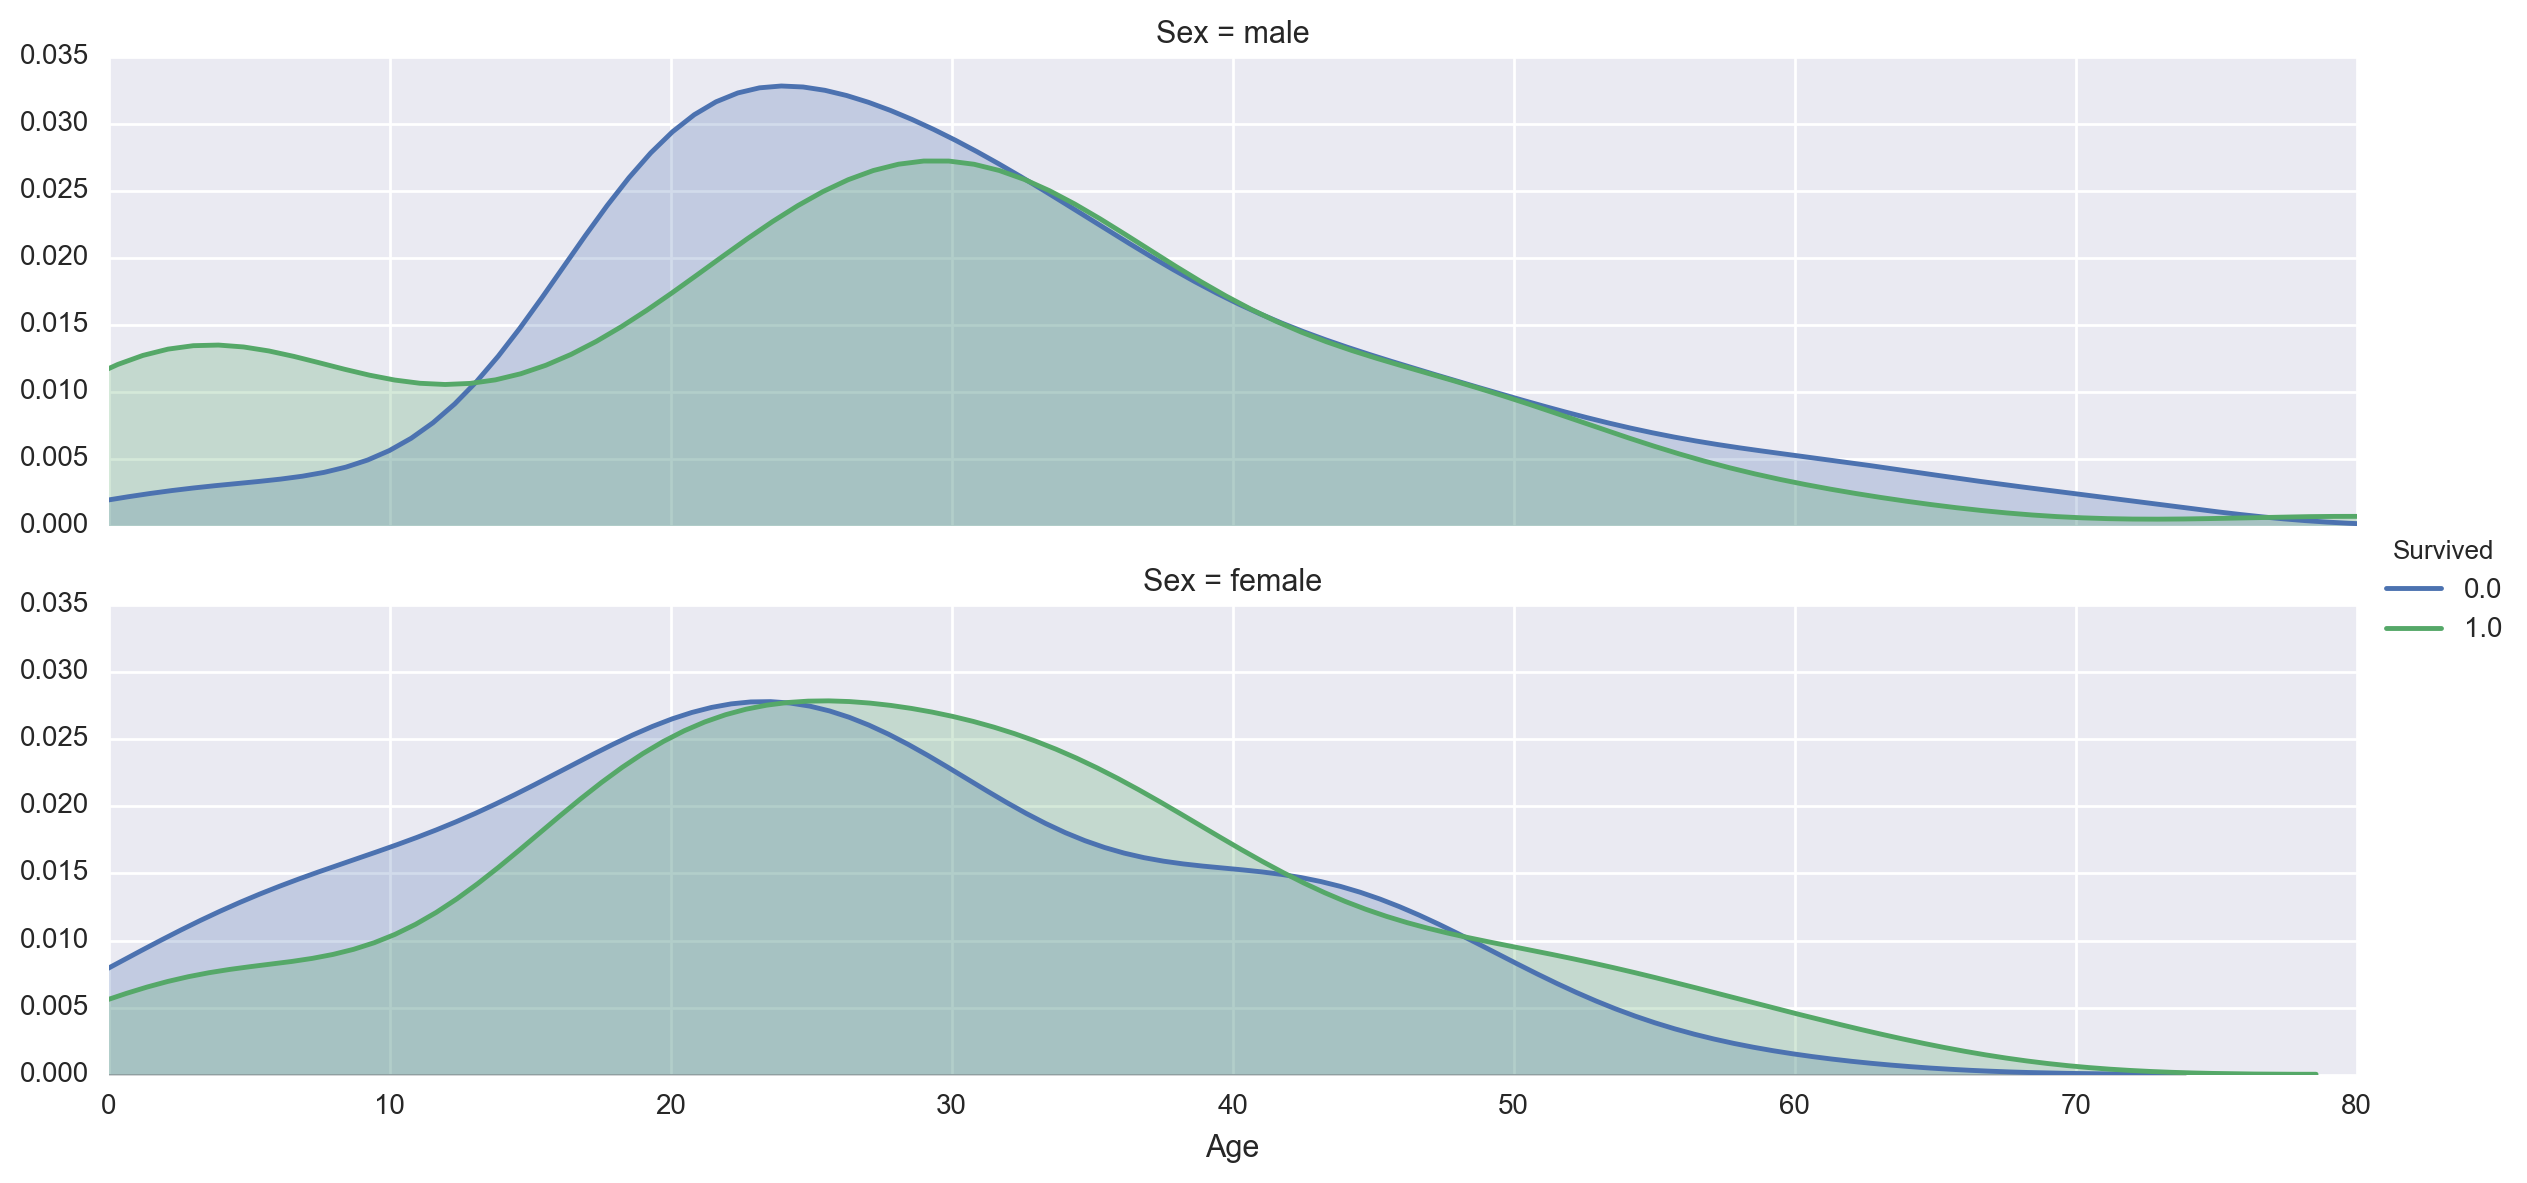

In [8]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

### 2.4.3 Excersise 1: Investigating numeric variables
It's time to get your hands dirty and do some coding! Try to plot the distributions of Fare of passangers who survived or did not survive. Then consider if this could be a good predictive variable.

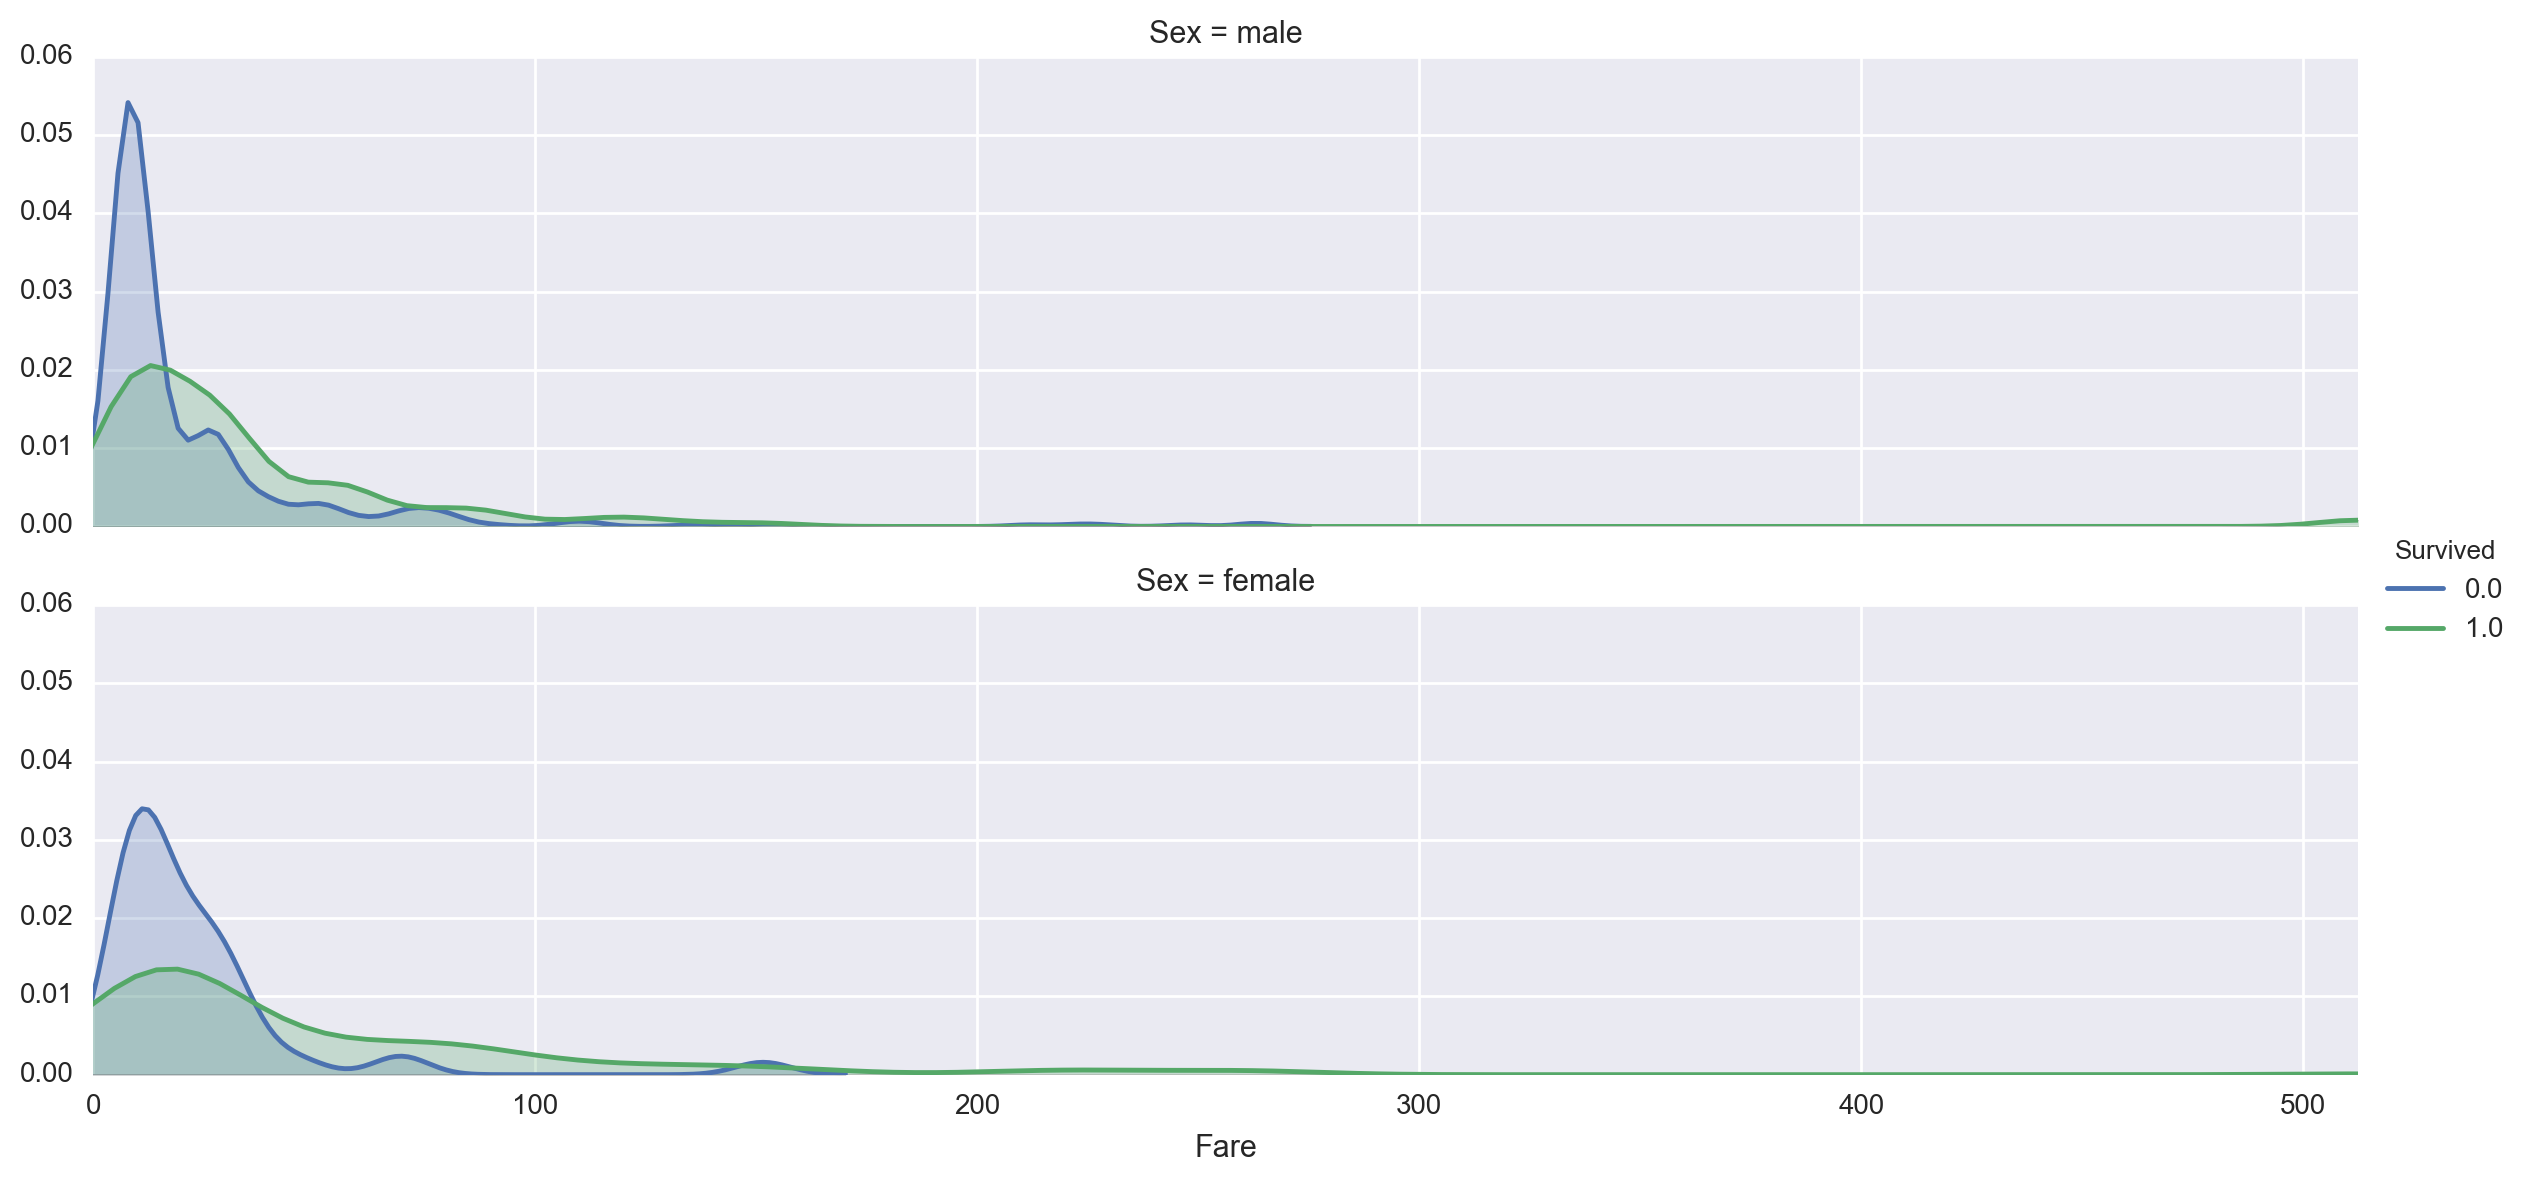

In [9]:
plot_distribution(titanic, var = "Fare", target = "Survived", row = "Sex")

### 2.4.4 Embarked
We can also look at categorical variables like Embarked and their relationship with survival.

- C = Cherbourg  
- Q = Queenstown
- S = Southampton

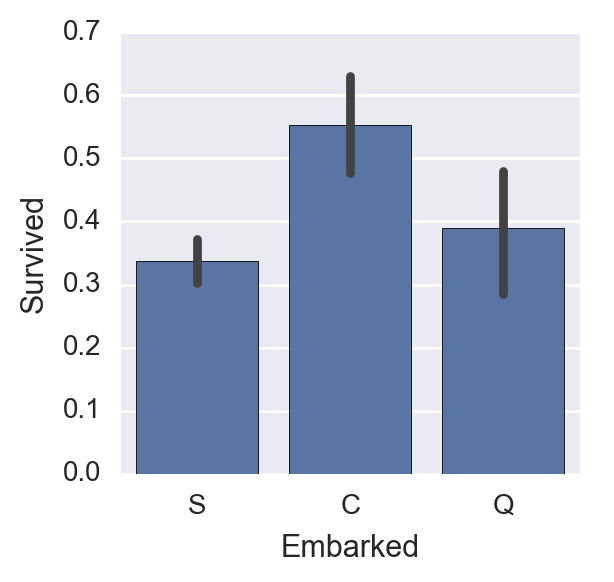

In [10]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

### 2.4.4 Excersise 2 - 5: Investigating categorical variables
Even more coding practice! Try to plot the survival rate of Sex, Pclass, SibSp and Parch below. 

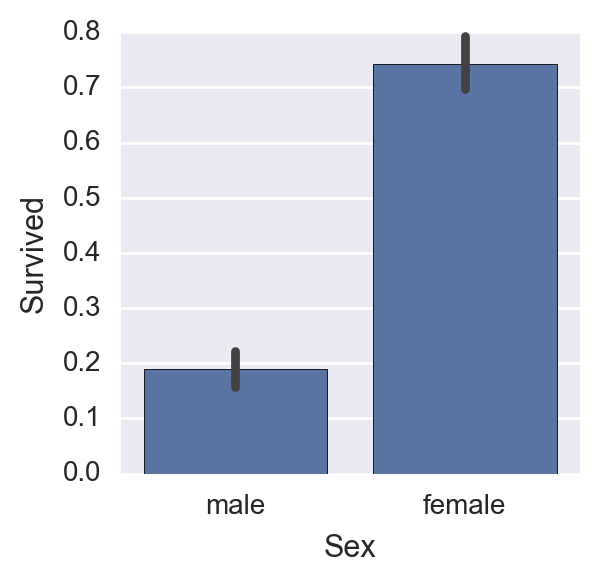

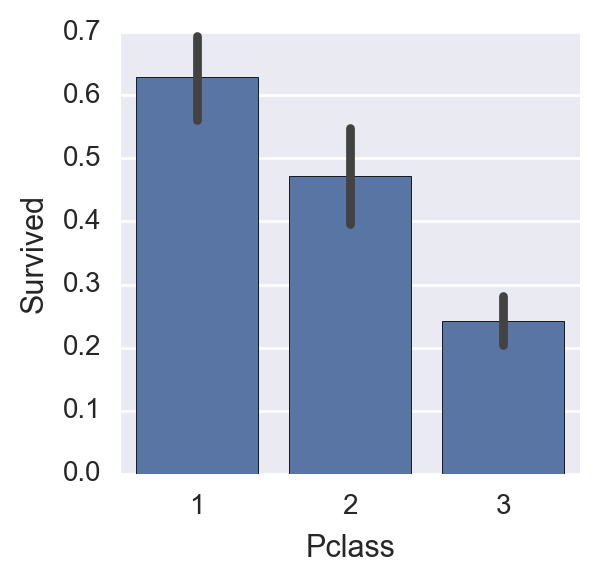

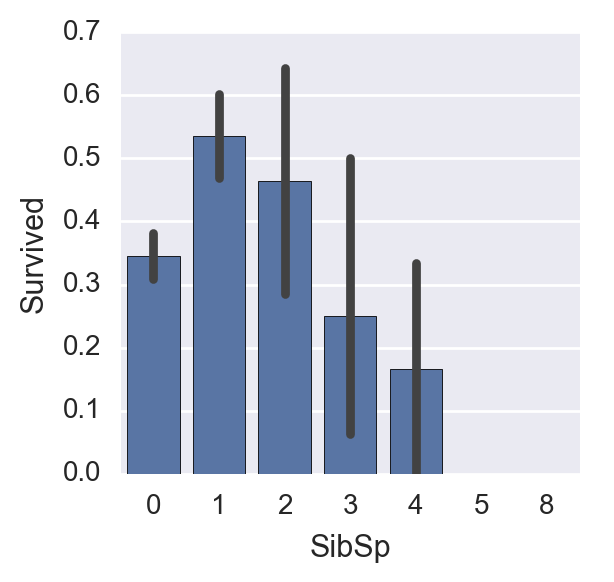

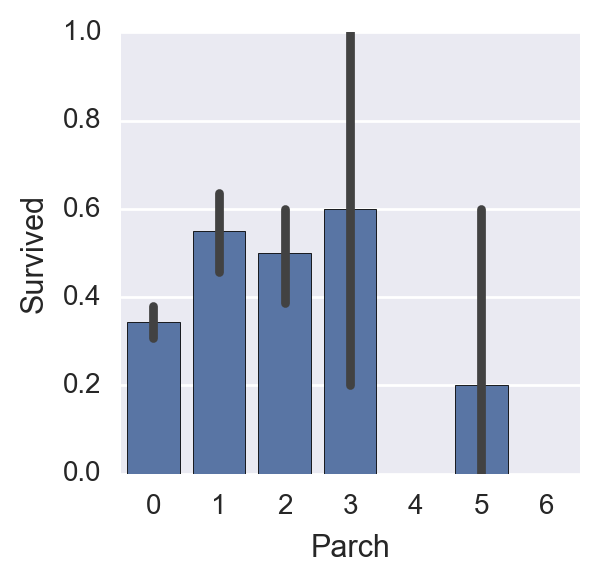

In [11]:
for i in ["Sex", "Pclass", "SibSp","Parch"]:
    plot_categories(titanic, cat = i, target = "Survived")

# 3. Data Preparation

## 3.1 Categorical variables need to be transformed to numeric variables
The variables *Embarked*, *Pclass* and *Sex* are treated as categorical variables. Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

This variable will have a value 1 if the row has a particular value and a value 0 if not. *Sex* is a dichotomy (old school gender theory) and will be encoded as one binary variable (0 or 1).

In [12]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [13]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [14]:
# Create a new variable for every unique value of Embarked
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


## 3.2 Fill missing values in variables
Most machine learning alghorims require all variables to have values in order to use it for training the model. The simplest method is to fill missing values with the average of the variable across all observations in the training set.

In [15]:
# Create dataset
imputed = pd.DataFrame()

# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )

# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


## 3.3 Feature Engineering &ndash; Creating new variables
Credit: http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

### 3.3.1 Extract titles from passenger names
Titles reflect social status and may predict survival probability

In [104]:
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = full[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


### 3.3.2 Extract Cabin category information from the Cabin number

In [17]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )

# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3.3.3 Extract ticket class from ticket number

In [18]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

ticket = pd.DataFrame()

# Extracting dummy variables from tickets:
ticket[ 'Ticket' ] = full[ 'Ticket' ].map( cleanTicket )
ticket = pd.get_dummies( ticket[ 'Ticket' ] , prefix = 'Ticket' )

ticket.shape
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 3.3.4 Create family size and category for family size
The two variables *Parch* and *SibSp* are used to create the famiy size variable

In [19]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


## 3.4 Assemble final datasets for modelling

Split dataset by rows into test and train in order to have a holdout set to do model evaluation on. The dataset is also split by columns in a matrix (X) containing the input data and a vector (y) containing the target (or labels).

### 3.4.1 Variable selection
Select which features/variables to inculde in the dataset from the list below:

 - imputed 
 - embarked
 - pclass
 - sex
 - family
 - cabin
 - ticket

In [273]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X = pd.concat( [imputed,pclass,sex,family[['Family_Single','FamilySize','Family_Small']]] , axis=1 )
full_X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex,Family_Single,FamilySize,Family_Small
0,22.0,7.2500,0.0,0.0,1.0,1,0,2,1
1,38.0,71.2833,1.0,0.0,0.0,0,0,2,1
2,26.0,7.9250,0.0,0.0,1.0,0,1,1,0
3,35.0,53.1000,1.0,0.0,0.0,0,0,2,1
4,35.0,8.0500,0.0,0.0,1.0,1,1,1,0


### 3.4.2 Create datasets
Below we will seperate the data into training and test datasets.

In [274]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

((1309, 9), (623, 9), (268, 9), (623,), (268,), (418, 9))


In [275]:
full_X.columns

Index([u'Age', u'Fare', u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Sex', u'Family_Single', u'FamilySize', u'Family_Small'], dtype='object')

### 3.4.3 Feature importance
Selecting the optimal features in the model is important. 
We will now try to evaluate what the most important variables are for the model to make the prediction.

0.977528089888


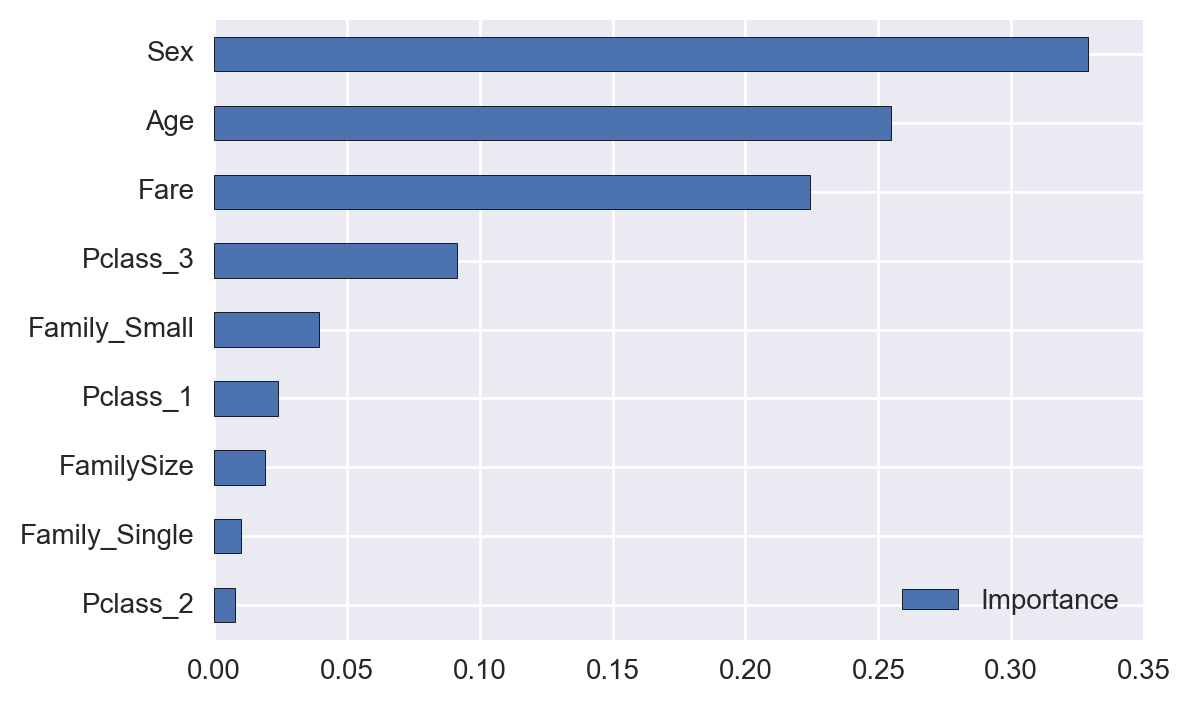

In [266]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

plot_variable_importance(train_X, train_y)

# 4. Modeling
We will now select a model we would like to try then use the training dataset to train this model and thereby check the performance of the model using the test set. 

## 4.1 Model Selection
Then there are several options to choose from when it comes to models. A good starting point is logisic regression. 

**Select ONLY the model you would like to try below and run the corresponding cell by pressing the play button.**

### 4.1.6 Logistic Regression
Try a Logistic Regression model by running the cell below. 

In [268]:
model = RandomForestClassifier(max_depth=20, n_estimators=100, max_features=None)

## 4.2 Train the selected model
When you have selected a dataset with the features you want and a model you would like to try it is now time to train the model. After all our preparation model training is simply done with the one line below.

In [269]:
model.fit( train_X , train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# 5. Evaluation
Now we are going to evaluate model performance and the feature importance.

## 5.1 Model performance
We can evaluate the accuracy of the model by using the validation set where we know the actual outcome. This data set have not been used for training the model, so it's completely new to the model. 

We then compare this accuracy score with the accuracy when using the model on the training data. If the difference between these are significant this is an indication of overfitting. We try to avoid this because it means the model will not generalize well to new data and is expected to perform poorly.

In [281]:
# Score the model
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

(0.87319422150882831, 0.81343283582089554)


In [277]:
model= RandomForestClassifier()
bb = GridSearchCV(model ,param_grid= {'max_depth':[5,10,15,20,50],'max_features':[1,3,5,6],'n_estimators':[10,30,60,100]}, cv=5,verbose=1)

In [278]:
bb.fit(train_X , train_y)
print "The best estimator: ",bb.best_estimator_
print "The best parameters: ",bb.best_params_
print "The best score: ",bb.best_score_
# Print the accuracy from the testing data.
print(accuracy_score(bb.predict(valid_X), valid_y))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.3min finished


The best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
The best parameters:  {'max_features': 5, 'n_estimators': 60, 'max_depth': 5}
The best score:  0.84430176565
0.80223880597


## 5.2 Feature importance - selecting the optimal features in the model
We will now try to evaluate what the most important variables are for the model to make the prediction. The function below will only work for decision trees, so if that's the model you chose you can uncomment the code below (remove # in the beginning)  and see the feature importance.

0.99036918138


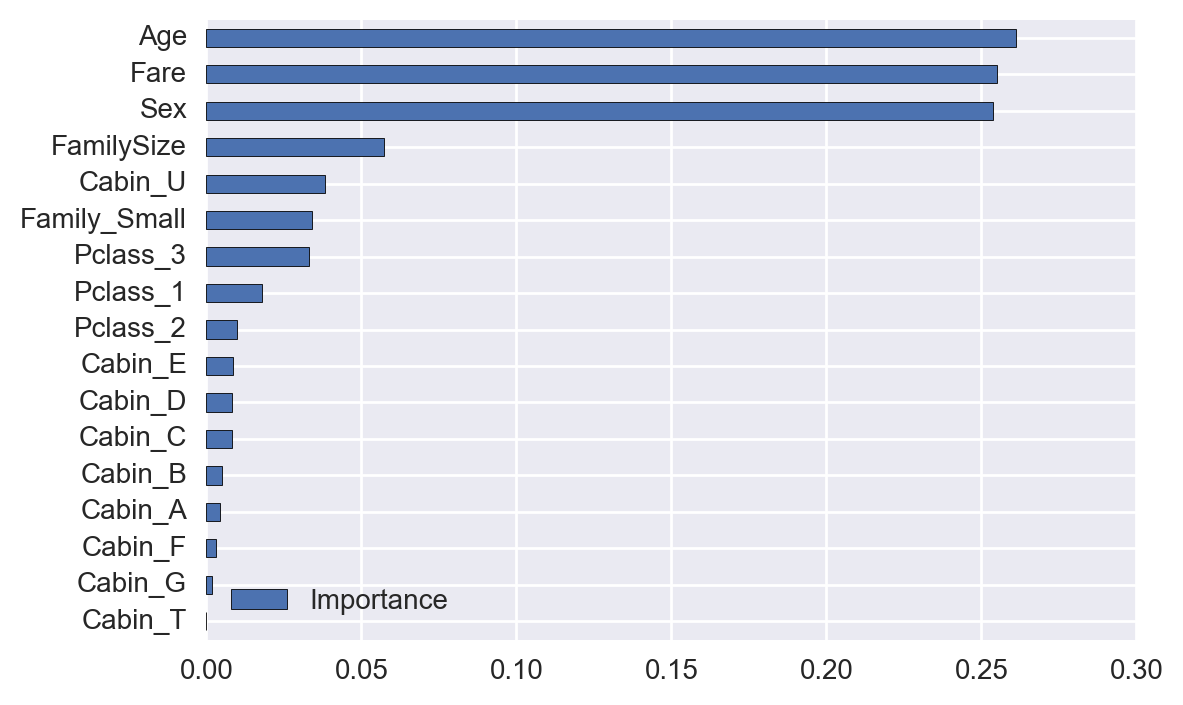

In [27]:
plot_model_var_imp(model, train_X, train_y)

In [279]:
model = RandomForestClassifier(max_depth=5, n_estimators=60, max_features=5)
model.fit( train_X , train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [280]:
test_Y = model.predict( test_X )
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )

test['Survived']=test['Survived'].apply(np.int64)
test.head()
test.to_csv( 'titanic_pred2.csv' , index = False )